<a href="https://colab.research.google.com/github/alexlopespereira/mba_enap/blob/main/CD/Atividades_Exercicios/Aula0_Atividades_Exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 0 - Atividades e Exercício (vale nota)
### Compartilhe o seu caderno com o professor enviando o link para o seu caderno [neste formulário](https://forms.gle/UYvwc6SpA6HyiqdM6).


In [ ]:
import pandas as pd
import seaborn as sns


## Atividade 0.1
### Considere o seguinte dataset

In [ ]:
url='https://docs.google.com/spreadsheets/d/16B0uAFH1hubqvXytaxEkh9J8fXAJugYi/edit?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_orders = pd.read_excel(url2, sheet_name='Orders')
df_orders.head()

,ProductID,ProductName,Price,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID,OrderDetailID,Quantity,FirstName,LastName,CategoryID,CategoryName
0,11,Queso Cabrales,21.00,10248,90,5,1996-07-04,3,1,12,Steven,Buchanan,4,Dairy Products
1,42,Singaporean Hokkien Fried Mee,14.00,10248,90,5,1996-07-04,3,2,10,Steven,Buchanan,5,Grains/Cereals
2,72,Mozzarella di Giovanni,34.80,10248,90,5,1996-07-04,3,3,5,Steven,Buchanan,4,Dairy Products
3,14,Tofu,23.25,10249,81,6,1996-07-05,1,4,9,Michael,Suyama,7,Produce
4,51,Manjimup Dried Apples,53.00,10249,81,6,1996-07-05,1,5,40,Michael,Suyama,7,Produce



#### Usando o plotnine, trace um gráfico temporal (de linha) com o faturamento/venda ($) total de cada categoria desta tabela. Pense em qual a escala temporal mais apropriada para analisar os dados. Diario? Semanal? Mensal?


,OrderMonth,CategoryName,TotalPrice
0,1996-07-01,Beverages,4297.50
1,1996-07-01,Condiments,2731.70
2,1996-07-01,Confections,7834.75
3,1996-07-01,Dairy Products,9231.70
4,1996-07-01,Grains/Cereals,1609.50


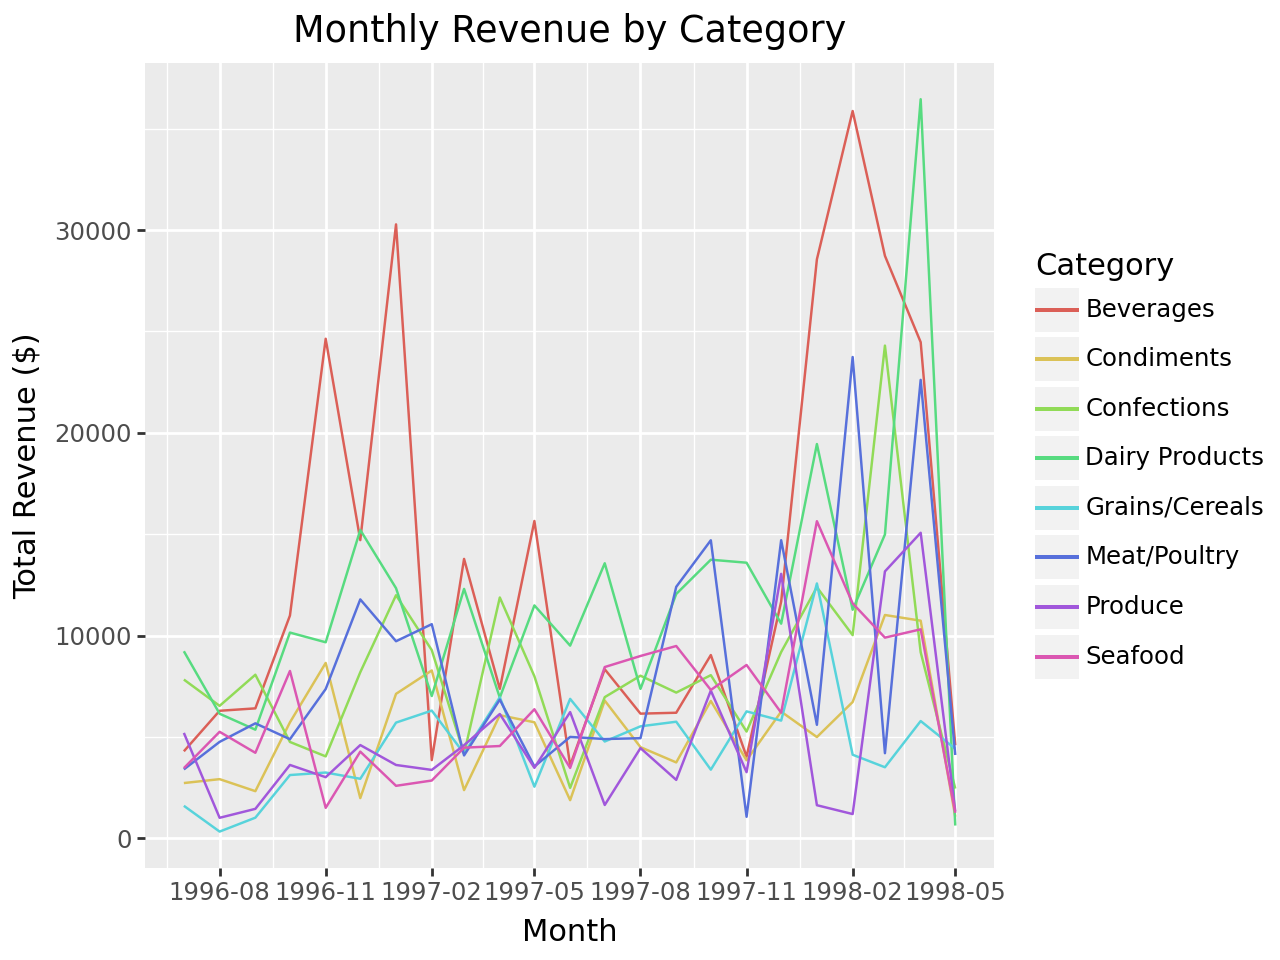

In [ ]:
# Create the line plot


## Atividade 0.2

### Faça uma query para contabilizar, por UF do estabelecimento de vacinação e vacina, quantas pessoas não tomaram a segunda dose da vacina contra a COVID-19 e o prazo para tomá-la já expirou.
#### Considere que o prazo para tomar a 2a dose da Coronavac é 30 dias, e o prazo para tomar a 2a dose da Pfizer e da Astrazeneca é 90 dias.
#### Você vai precisar informar um project id criado por você na GCP, conforme explicado na aula. Replico aqui os links de tutoriais

> Use o [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) para **criar um projeto na Google Cloud Platform (GCP)**, se você ainda não tem um.
>
> [Habilite as APIs do BigQuery](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) para o projeto.


##### Dica 1: Esta é uma tabela que guarda transações, e não entidades
##### Dica 2: Limite suas queries ao estado do Acre para não acabar com a sua cota do sandbox.
##### Dica 3: **Faça primeiro a query funcionar no editor de SQL do bigquery** e depois coloque o código aqui. Por que?
##### Obs.: As atividades práticas da próxima aula serão outras. Não haverá tempo na próxima aula para resolver esse exercício. Apenas, será apresentada a solução. Se quiser tentar fazer sozinho, tente antes da próxima aula.

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
%%bigquery df --project MEUPROJECTID


### Atividade 0.3
Faça um gráfico de barras contendo esta informação. Não precisa carregar todos os dados da tabela, por simplicidade e economia de quota, plote um extrato menor apenas para demonstrar o conceito.
#### Obs.: hardy-messenger-229417 é o project-id do projeto do professor, **troque pelo seu project-id**

Faça um gráfico semelhante a este
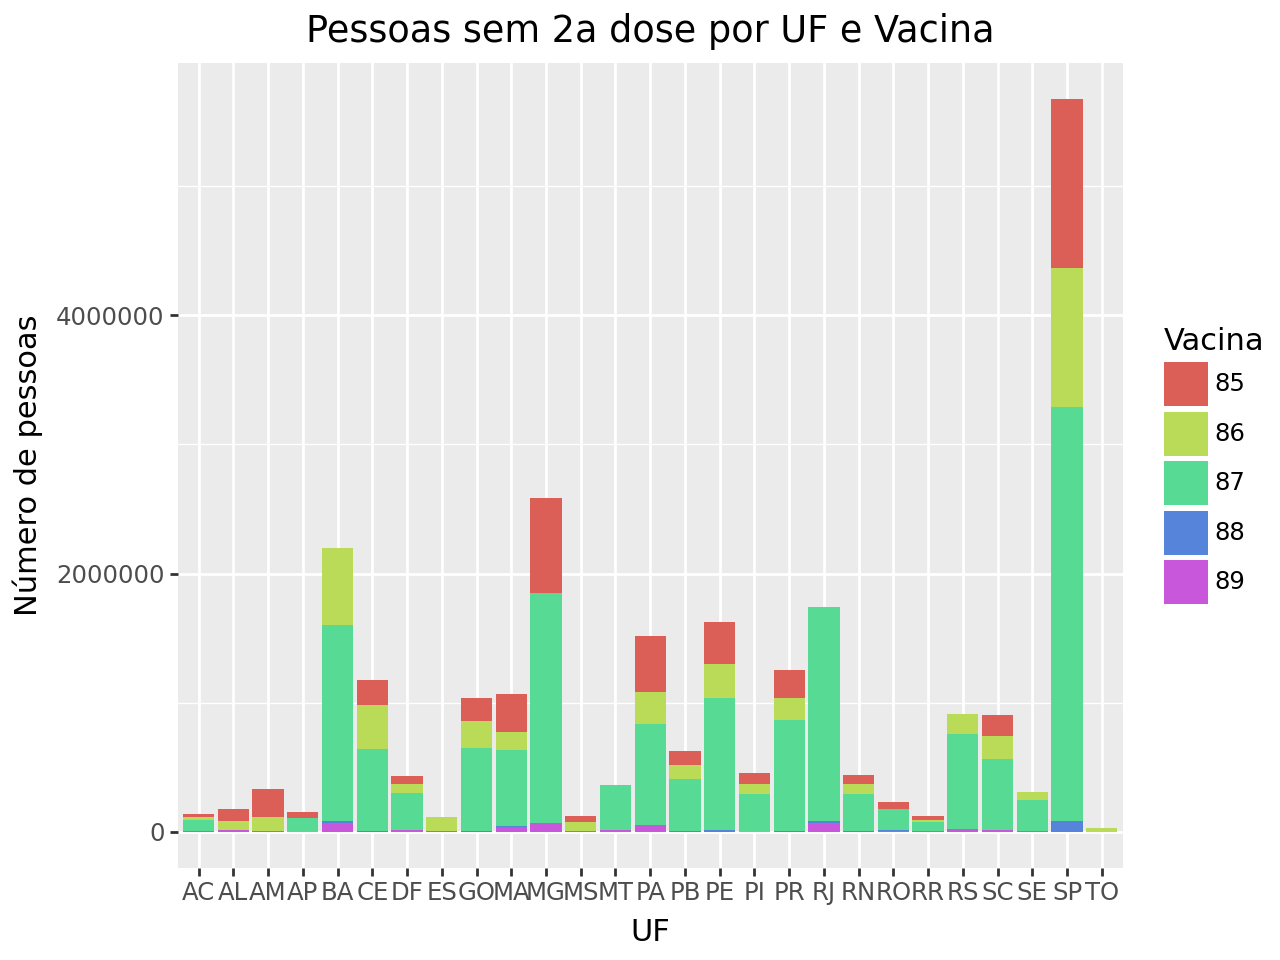

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df.head()

,naotomou2aDose,sigla_uf,vacina
0,590106,BA,86
1,644057,GO,87
2,103289,ES,86
3,283474,DF,87
4,1076739,SP,86


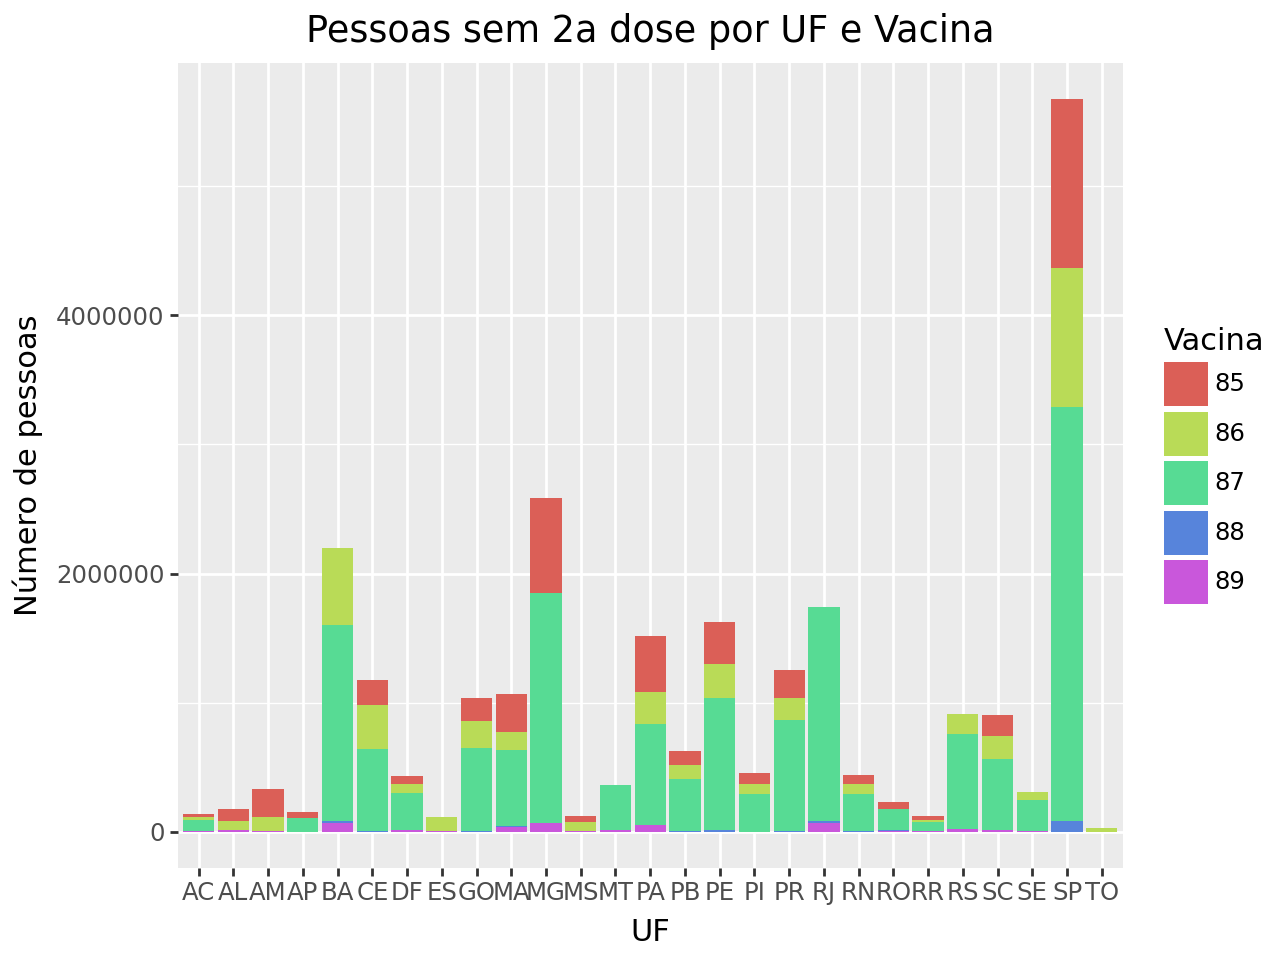

### Exercício 0.1
#### Usando o plotnine, produza um gráfico equivalente ao gráfico abaixo, mas no contexto do índice de gini dos municípios brasileiros. Os dados do índice de gini encontram-se aqui https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/gini/ginibr.csv. Este [tutorial no youtube](https://youtu.be/q816IZuqVNo?t=242) demonstra passo a passo como esse gráfico foi produzido.
#### Adaptações ao nosso exercício:

1.   Considere que as espécies (do gráfico abaixo) serão os anos 1991, 2000 e 2010 (que são colunas do dataset do índice de gini)
2.   E que a variável sexo será representada por Norte (UFs do Norte e Nordeste) e Sul (Sudeste, centro-oeste e sul). Não há um juízo de valor aqui, só uma maneira de criar uma variável binária e criar uma equivalência ao gráfico abaixo.



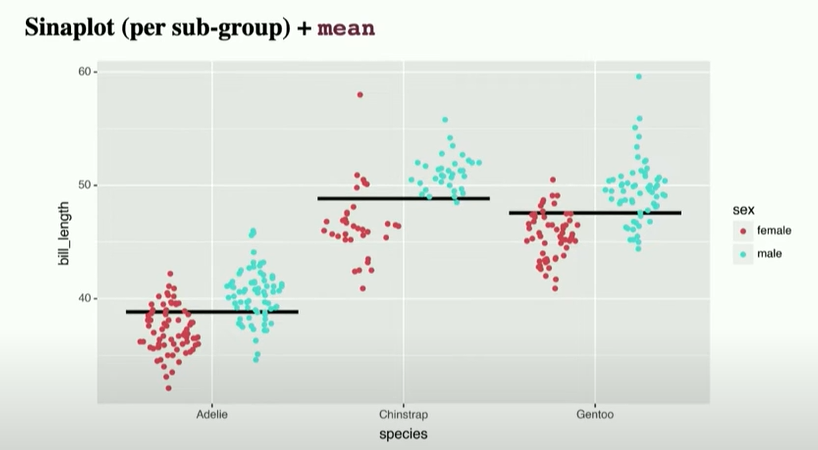

,Município,cod_ibge,uf,grupo,ano,gini
0,110001 Alta Floresta D'Oeste,110001,11,Norte,1991,0.5983
3,110034 Alvorada D'Oeste,110034,11,Norte,1991,0.5690
4,110002 Ariquemes,110002,11,Norte,1991,0.5827
6,110003 Cabixi,110003,11,Norte,1991,0.6527
8,110004 Cacoal,110004,11,Norte,1991,0.6800


In [ ]:
# Calculate the mean gini for each UF and year
df_gini_mean_by_uf_year = df_long.groupby(['uf', 'ano'])['gini'].mean().reset_index()
df_gini_mean_by_uf_year['grupo'] = np.where(df_gini_mean_by_uf_year['uf'].isin(norte_nordeste), 'Norte', 'Sul')

# Display the new DataFrame
display(df_gini_mean_by_uf_year.head())

,uf,ano,gini,grupo
0,11,1991,0.586809,Norte
1,11,2000,0.589750,Norte
2,11,2010,0.536892,Norte
3,12,1991,0.555500,Norte
4,12,2000,0.606527,Norte


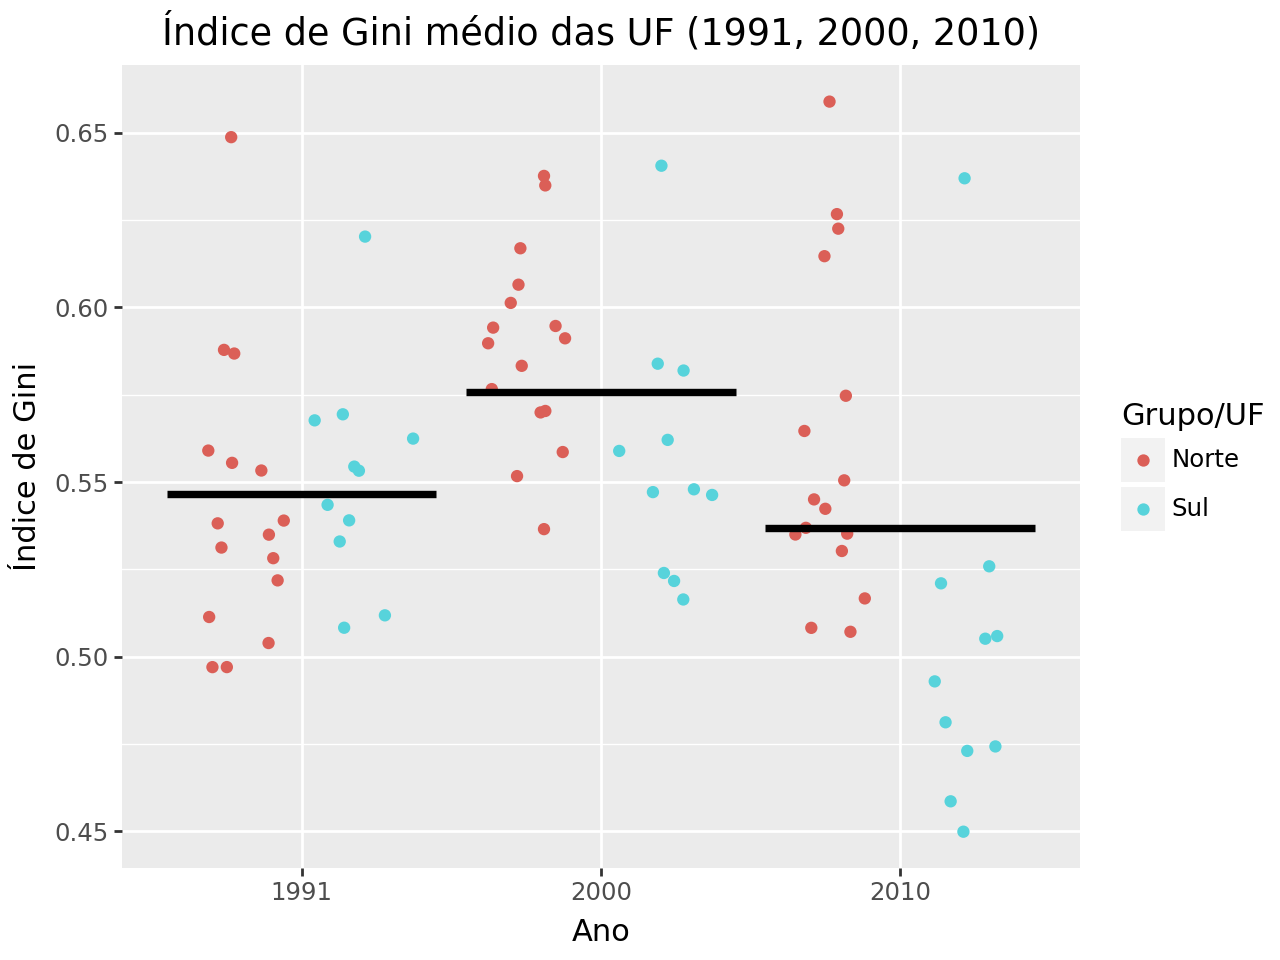

In [ ]:
# Cria o plot (ajuste o tema conforme desejado)
p = (
    ggplot(df_gini_mean_by_uf_year, aes('ano', 'gini', color='grupo'))
    + geom_sina()
    + geom_segment(aes(
                      x=stage("ano", after_stat="x-.45"),
                      xend=stage("ano", after_stat="x+.45"),
                      yend=after_stat("y")
                      ),
                   stat="summary",
                   fun_y=np.mean,
                   color="black",
                   size=1.5
                  )

    + labs(
        title='Índice de Gini médio das UF (1991, 2000, 2010)',
        x='Ano',
        y='Índice de Gini',
        color='Grupo/UF' # Update legend title
    )
)
p